In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [4]:
data = pd.read_csv("Coronavirus Tweets.csv",encoding='latin1')

In [5]:
df=pd.DataFrame(data)
df.head(10)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1.236800e+18,1.331840e+08,2020-03-09T00:00:00Z,EcuadorTV,"HOY | 20H00\n@CataAndramuno, ministra de @Salu...",Twitter Media Studio,NaN,NaN,NaN,False,...,5,NaN,NaN,NaN,527405,1166,NaN,2010-04-15T06:31:39Z,True,es
1,1.236800e+18,1.186300e+18,2020-03-09T00:00:00Z,DanielAnthonyL2,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...,TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,85,508,NaN,2019-10-21T14:56:27Z,False,zh
2,1.236800e+18,9.779450e+17,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,1096,835,NaN,2018-03-25T16:28:09Z,False,en
3,1.236800e+18,2.700096e+08,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,783214.0,Twitter,False,...,0,NaN,NaN,NaN,202,624,NaN,2011-03-21T21:03:44Z,False,en
4,1.236800e+18,8.462100e+17,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,5777,6332,NaN,2017-03-27T04:00:34Z,False,en
5,1.236800e+18,1.111290e+18,2020-03-09T00:00:36Z,SaintBrothel,Simple math proves the Chinese government is l...,Twitter for iPhone,NaN,NaN,NaN,True,...,0,NaN,NaN,NaN,3725,3812,NaN,2019-03-28T15:34:27Z,False,en
6,1.236800e+18,9.031460e+17,2020-03-09T00:00:38Z,PatriciaSbd,Es increÃ­ble la incompetencia e irresponsabil...,Twitter for Android,NaN,NaN,NaN,True,...,8,ES,"Sabadell, Spain",city,6341,3576,NaN,2017-08-31T06:44:38Z,False,es
7,1.236800e+18,1.222270e+18,2020-03-09T00:00:42Z,BytesCrypto,#CoronavirusOutbreak\nð®ð¹ 7 381\nð«ð·...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,41,157,NaN,2020-01-28T21:40:48Z,False,und
8,1.236800e+18,2.706523e+08,2020-03-09T00:00:42Z,BlackPearl_Inc,Classes were suspended in the following cities...,Twitter Web App,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,399,2832,NaN,2011-03-23T00:50:38Z,False,en
9,1.236800e+18,2.706523e+08,2020-03-09T00:00:43Z,BlackPearl_Inc,Manila Tytana Colleges\n\nTrinity University o...,Twitter Web App,1.236800e+18,270652316.0,BlackPearl_Inc,False,...,0,NaN,NaN,NaN,399,2832,NaN,2011-03-23T00:50:38Z,False,en


In [19]:
# df.info()
ndf = df[["created_at","screen_name", "text"]]
ndf.head(10)

,created_at,screen_name,text
0,2020-03-09T00:00:00Z,EcuadorTV,"HOY | 20H00\n@CataAndramuno, ministra de @Salu..."
1,2020-03-09T00:00:00Z,DanielAnthonyL2,ç³å®¶åºçä¸ä¸ªå°å­©ãå¯æåï¼\n\n#å...
2,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...
3,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...
4,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...
5,2020-03-09T00:00:36Z,SaintBrothel,Simple math proves the Chinese government is l...
6,2020-03-09T00:00:38Z,PatriciaSbd,Es increÃ­ble la incompetencia e irresponsabil...
7,2020-03-09T00:00:42Z,BytesCrypto,#CoronavirusOutbreak\nð®ð¹ 7 381\nð«ð·...
8,2020-03-09T00:00:42Z,BlackPearl_Inc,Classes were suspended in the following cities...
9,2020-03-09T00:00:43Z,BlackPearl_Inc,Manila Tytana Colleges\n\nTrinity University o...


In [20]:
ndf.rename(columns={'Sentiment140': 'Sentiment'}, inplace=True)
sns.countplot(x=df['Sentiment'], data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])


c:\users\yatharth\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


KeyError: 'Sentiment'

In [7]:
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)|(https)")
tweet = []
for i in df["OriginalTweet"]:
  tweet.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)

KeyError: 'OriginalTweet'

In [10]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,Gahan https t co iFz9FAn2Pa and https ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the ou...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))     # make a set of stopwords
vectoriser = TfidfVectorizer(stop_words=None)

In [12]:
X_train = vectoriser.fit_transform(df["CleanedTweet"])
# Encoding the classes in numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(df['Sentiment'])
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
# importing the Test dataset for prediction and testing purposes
test_data = pd.read_csv("Corona_NLP_test.csv",encoding='latin1')
test_df = pd.DataFrame(test_data)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [14]:
reg1 = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in test_df["OriginalTweet"]:tweet.append(reg1.sub(" ", i))
test_df = pd.concat([test_df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,TRENDING New Yorkers encounter empty supermar...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,When I couldn t find hand sanitizer at Fred Me...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,Find out how you can protect yourself and love...
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,buying hits City as anxious shoppers stock...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,19 One week everyone...


In [15]:
X_test = vectoriser.transform(test_df["CleanedTweet"])
y_test = encoder.transform(test_df["Sentiment"])
# Prediction
y_pred = classifier.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,0,4
1,4,4
2,1,4
3,2,2
4,3,2


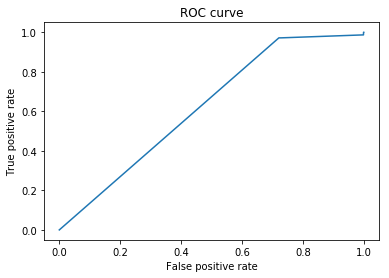

AUC of the predictions: 0.6231713165790018


In [16]:
from sklearn import metrics
# Generate the roc curve using scikit-learn.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
# Measure the area under the curve. The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))